## **4) ✨ Hacer predicciones con el modelo guardado.**

En este ultimo paso, solo debo cargar el modelo guardado previamente y hacer las predicciones con el set de datos de ***test.csv***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sys

sys.path.append('..')
from py.pipeline import Ingenieria

Cargo el modelo y el transformer.

In [2]:
with open('../pickle/modelo.pkl', 'rb') as _file:
    modelo = pickle.load(_file)

with open('../pickle/transformer.pkl', 'rb') as _trans:
    transformer = pickle.load(_trans)

In [3]:
# Carga de los datasets
test = pd.read_csv('../datasets/titanic-test.csv')
test_ext = pd.read_csv('../datasets/titanic-test-extended.csv')

In [ ]:
df = Ingenieria(test, test_ext, dataset='test', transformer=transformer)

In [5]:
df.isna().sum()

Age              0
Fare             1
Survived        22
Sex_female       0
Sex_male         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
FamilySize       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
dtype: int64

Veo que la columna de `Survived` tiene valores nulos, por lo que, elimino esos reistros ya que es imposible saber cual es el valor real del target.

In [6]:
df = df.dropna(subset='Survived').reset_index(drop=True)

In [7]:
x, y = df.drop('Survived', axis = 1), df.Survived
y_pred = modelo.predict(x)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y, y_pred)
print('Accuracy:', acc)

Accuracy: 0.7678100263852242


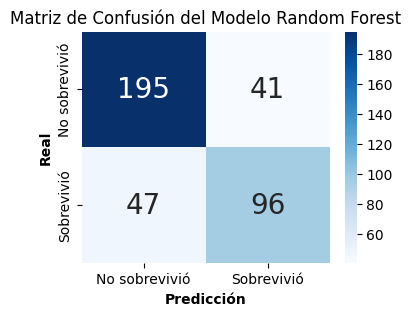

In [9]:
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No sobrevivió', 'Sobrevivió'],
            yticklabels=['No sobrevivió', 'Sobrevivió'],
            annot_kws={"size": 20})

plt.ylabel('Real', fontweight='bold')
plt.xlabel('Predicción', fontweight='bold')
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.show()